#Install necessary libraries by running the following code:

In [19]:
!pip install nltk scikit-learn pandas matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Load Dataset

In [6]:
from google.colab import files
df = pd.read_csv('/content/IMDB Dataset.csv')


#Data Preprocessing

In [20]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return ' '.join(words)

df['cleaned_review'] = df['review'].apply(preprocess_text)

# Convert sentiments to numerical labels
df['sentiment_label'] = df['sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 2})


#Split the Data

In [21]:
X = df['cleaned_review']
y = df['sentiment_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Vectorization with TF-IDF

In [9]:
vectorizer = TfidfVectorizer(max_features=1000)  # Use top 1000 words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


#Train the Model

In [10]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

#Evaluate the Model

In [11]:
y_pred = model.predict(X_test_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[4245  716]
 [ 613 4426]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



#Make Predictions

In [24]:
# Take input from the user
user_review = input("Enter a review: ")
new_review_tfidf = vectorizer.transform([user_review])
prediction = model.predict(new_review_tfidf)

# Dictionary to convert predictions to labels
sentiment_dict = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}
print(f"Sentiment Prediction: {sentiment_dict[prediction[0]]}")


Enter a review: "Oh wow, what an amazing product! It broke within two days, and the customer support was non-existent. Highly recommend it if you enjoy wasting money."
Sentiment Prediction: Positive


#Visualize the Results

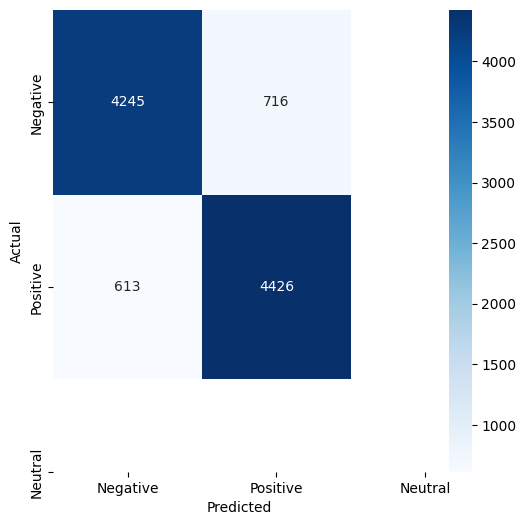

In [18]:
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_dict.values(), yticklabels=sentiment_dict.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
